In [1]:
import pandas as pd
from empath import Empath
import collections
import numpy as np
import os

raw_data = pd.read_csv('/media/jose/A63C16883C1654211/Proyectos/Sentiment-Wellness-Tool/data.csv')

bitmap_data = None

#region Data Transformation
def get_features(data):
    data_mod = data.dropna()

    lexicon = Empath()
    result = []

    for data in data_mod['statement']:
        try:
            result.append(lexicon.analyze(data))
        except:
            print(data)
            break

    return result


#endregion

In [2]:
features = get_features(raw_data)
features

[{'help': 0.0,
  'office': 0.0,
  'dance': 0.0,
  'money': 0.0,
  'wedding': 0.0,
  'domestic_work': 0.0,
  'sleep': 0.0,
  'medical_emergency': 0.0,
  'cold': 0.0,
  'hate': 0.0,
  'cheerfulness': 0.0,
  'aggression': 0.0,
  'occupation': 0.0,
  'envy': 0.0,
  'anticipation': 0.0,
  'family': 0.0,
  'vacation': 0.0,
  'crime': 0.0,
  'attractive': 0.0,
  'masculine': 0.0,
  'prison': 0.0,
  'health': 0.0,
  'pride': 0.0,
  'dispute': 0.0,
  'nervousness': 0.0,
  'government': 0.0,
  'weakness': 0.0,
  'horror': 0.0,
  'swearing_terms': 0.0,
  'leisure': 0.0,
  'suffering': 0.0,
  'royalty': 0.0,
  'wealthy': 0.0,
  'tourism': 0.0,
  'furniture': 0.0,
  'school': 0.0,
  'magic': 0.0,
  'beach': 0.0,
  'journalism': 0.0,
  'morning': 0.0,
  'banking': 0.0,
  'social_media': 0.0,
  'exercise': 0.0,
  'night': 0.0,
  'kill': 0.0,
  'blue_collar_job': 0.0,
  'art': 0.0,
  'ridicule': 0.0,
  'play': 0.0,
  'computer': 0.0,
  'college': 0.0,
  'optimism': 0.0,
  'stealing': 0.0,
  'real_esta

In [7]:
# f1 = features[1]
# for k in f1:
#     if f1[k] > 0:
#         print(k,f1[k]) 


dance 1.0
confusion 1.0
hearing 1.0
music 1.0
listen 1.0
negative_emotion 2.0
musical 1.0


In [12]:
# new fratures
transformed_data = pd.DataFrame(features)

transformed_data

help  office  dance  money  wedding  domestic_work  sleep  \
0       0.0     0.0    0.0    0.0      0.0            0.0    0.0   
1       0.0     0.0    1.0    0.0      0.0            0.0    0.0   
2       0.0     0.0    0.0    0.0      0.0            0.0    0.0   
3       0.0     0.0    0.0    0.0      0.0            0.0    0.0   
4       0.0     0.0    0.0    0.0      0.0            0.0    0.0   
...     ...     ...    ...    ...      ...            ...    ...   
52676   2.0     0.0    0.0    0.0      1.0            3.0    1.0   
52677   0.0     0.0    0.0    0.0      2.0            1.0    0.0   
52678   0.0     0.0    0.0    0.0      0.0            0.0    2.0   
52679   0.0     1.0    0.0    0.0      0.0            0.0    0.0   
52680   0.0     0.0    0.0    0.0      0.0            0.0    0.0   

       medical_emergency  cold  hate  ...  weapon  children  monster  ocean  \
0                    0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
1                    0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
2                    0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
3                    0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
4                    0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
...                  ...   ...   ...  ...     ...       ...      ...    ...   
52676                0.0   1.0   5.0  ...     0.0       2.0      0.0    0.0   
52677                0.0   1.0   1.0  ...     0.0       3.0      0.0    0.0   
52678                0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
52679                0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
52680                1.0   1.0   1.0  ...     0.0       0.0      0.0    0.0   

       giving  contentment  writing  rural  positive_emotion  musical  
0         0.0          0.0      0.0    0.0               0.0      0.0  
1         0.0          0.0      0.0    0.0               0.0      1.0  
2         0.0          0.0      0.0    0.0               0.0      0.0  
3         0.0          0.0      0.0    0.0               0.0      0.0  
4         0.0          0.0      0.0    0.0               0.0      0.0  
...       ...          ...      ...    ...               ...      ...  
52676     1.0          3.0      0.0    2.0               6.0      0.0  
52677     0.0          1.0      1.0    0.0               3.0      0.0  
52678     0.0          0.0      0.0    0.0               0.0      0.0  
52679     1.0          0.0      0.0    0.0               0.0      0.0  
52680     0.0          1.0      0.0    0.0               1.0      0.0  

[52681 rows x 194 columns]

In [13]:

# start clustering

# Start from importing necessary packages.
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

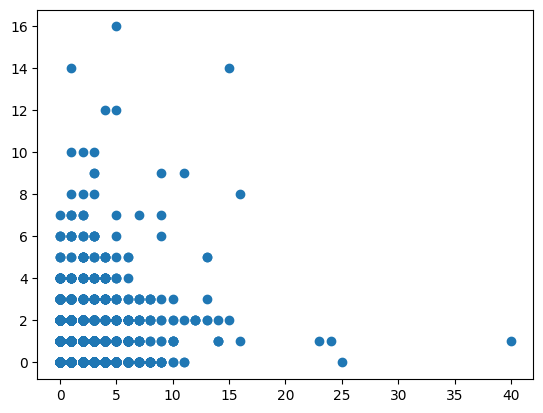

In [23]:
X = transformed_data.values

Y = transformed_data.columns.values

# Grafica la distribución de datos (_ground truth_) usando matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,1])

In [29]:
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""
kmeans = KMeans(n_clusters=10,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 6676751.0.
Iteration 1, inertia 4669915.774481883.
Iteration 2, inertia 4519147.604929785.
Iteration 3, inertia 4428223.978296576.
Iteration 4, inertia 4359657.472981762.
Iteration 5, inertia 4301831.917399977.
Iteration 6, inertia 4273806.971735798.
Iteration 7, inertia 4255501.071552098.
Iteration 8, inertia 4241110.977569381.
Iteration 9, inertia 4228068.509593687.
Iteration 10, inertia 4216225.608791577.
Iteration 11, inertia 4206886.8502345905.
Iteration 12, inertia 4199381.103556201.
Iteration 13, inertia 4192790.8040060443.
Iteration 14, inertia 4187978.521849231.
Iteration 15, inertia 4184467.2672455814.
Iteration 16, inertia 4181547.515931905.
Iteration 17, inertia 4179601.4082384706.
Iteration 18, inertia 4177975.074627273.
Iteration 19, inertia 4176949.341097084.
Iteration 20, inertia 4176205.7936948715.
Iteration 21, inertia 4175594.930679951.
Iteration 22, inertia 4175056.9385688696.
Iteration 23, inertia 4174670.2926152116.
Ite

In [34]:
#kmeans.labels_
kmeans.cluster_centers_[3]


10

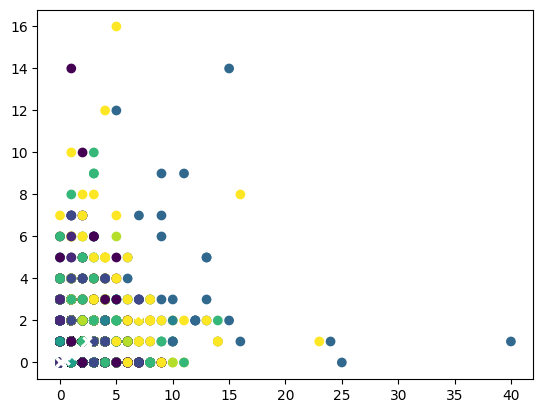

In [32]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)